### Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(18285, 5)

###  Checking Dristribution

In [8]:
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])      ## it will return barplot of labels

In [9]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [10]:
df['label'] = df['label'].astype(str) # converted label int datatype into obj for plot.
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

<AxesSubplot:xlabel='label', ylabel='count'>

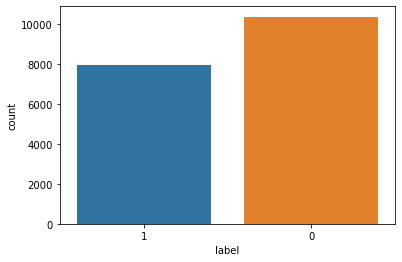

In [11]:
create_distribution('label')

#### Conclusion:
- From above plot we can see that our data is not imbalanced

In [12]:
df.head(20)  ## Entities are missing 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
messages = df.copy()

In [14]:
messages.reset_index(inplace=True)

In [15]:
messages.head(10)  #the issue is fixed but now drop index and id

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [16]:
messages.drop(['index','id'],axis=1,inplace=True)

In [17]:
messages.head()  

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### why to reset index ,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset index

In [18]:
#note we will consider only title for pre-processing
data = messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [19]:
#remove special characters from title
import re

In [20]:
re.sub('[^a-zA-Z]',' ',data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [21]:
# Perform lower case operation to convert it into vector representation.
data = data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [22]:
list = data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [23]:
# Perform stemming operation
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [24]:
ps = PorterStemmer()

In [25]:
#review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [26]:
review = []
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))

review        

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [27]:
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [28]:
### lets do same task for each & every row
corpus = []
sentences = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    list = review.split()
    review =[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences = ' '.join(review)
    corpus.append(sentences)

In [29]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [30]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [31]:
len(corpus)

18285

In [32]:
# Applying Βag of Words.
from sklearn.feature_extraction.text import CountVectorizer #BoW
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [33]:
X = cv.fit_transform(corpus).toarray()

In [34]:
X.shape  #Converted text data into vector representation using BoW's.

(18285, 5000)

In [35]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# Get top 20 features

cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [37]:
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [38]:
y = messages['label']

In [39]:
# Splitting data into Train and Test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
X_train.shape

(13713, 5000)

In [41]:
X_test.shape

(4572, 5000)

<h3> Multinomial NaiveBayes Algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB #Works good with text data
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [44]:
pred = classifier.predict(X_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [45]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,pred)
acc

0.8904199475065617

In [46]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test,pred)
cm

array([[2301,  299],
       [ 202, 1770]], dtype=int64)

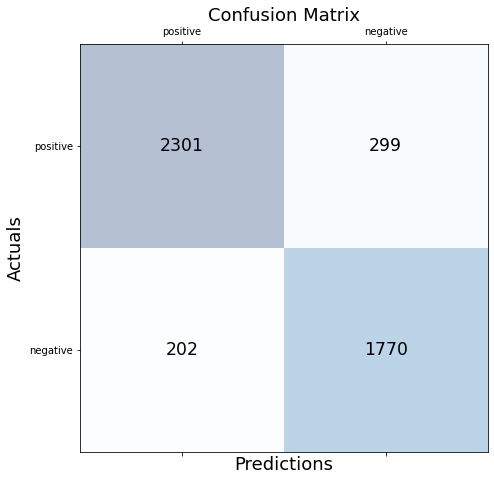

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)  # Replaced 0,1 with labels
plt.yticks(tick_marks,labels)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [55]:
labels=['positive','negative']
np.arange(len(labels))

array([0, 1])

<h5> Naive bayes Algorithm gives us accuracy of 89% 

<h3> Passive Aggressive Classifier Algorithm

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [57]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [58]:
predictions = linear_clf.predict(X_test)

In [59]:
metrics.accuracy_score(y_test,predictions)

0.9116360454943132

In [60]:
cm2 = metrics.confusion_matrix(y_test,predictions)
cm2

array([[2366,  234],
       [ 170, 1802]], dtype=int64)

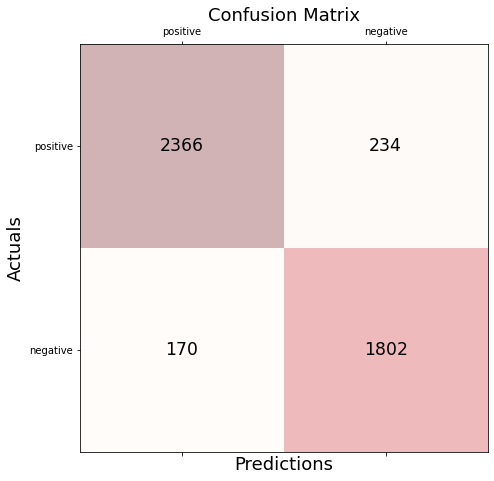

In [61]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)  # Replaced 0,1 with labels
plt.yticks(tick_marks,labels)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
## Get Features names
#to detect which fake and which is most real word
feature_names = cv.get_feature_names()

In [63]:
classifier.coef_[0]   #after passing [0] it gets converted into 1D array

array([ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
        -8.72706912,  -9.4202163 ])

<h4> Higher the negative value more the word is fake

In [64]:
#Top 20 real values
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]

<h3> Save the Model

In [49]:
import joblib

In [51]:
joblib.dump(classifier,"model.pkl")

['model.pkl']

In [74]:
model = joblib.load('model.pkl')